In [1]:
from pygo import optimization_problem as op
from pygo import global_optimizers as go
import numpy as np
import matplotlib.pyplot as plt

## Genetic Algorithm Examples
Here we demonstrate how to use genetic using a number of well known optimization test functions. There are currently 2 variations of particle swarm

The well knowns used optimization test functions are
- Booth function
- Matyas funcion
- Rosenbrock function (2d)
- Mccormick function
- Easom function
- Bukin function
- Drop wave function
- Rastrigin function

These were adapted from [https://www.sfu.ca/~ssurjano/optimization.html]()

### Booth function
$$f(\textbf {x}) = (x_1+2x_2-7)^2+(2x_1+x_2-5)^2$$
<b>Input Domain</b>
$x_i \in [-10,10]$ for all $i=1,2$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(1,3),f(\textbf{x}^*)=0$  

x* [1.00044003 2.99938183]
f(x*) 7.027069909566303e-07


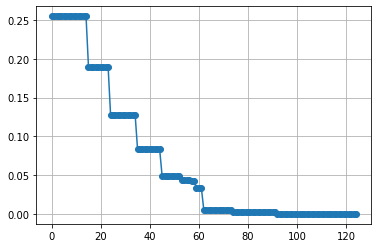

In [2]:
opp = op.OptimizationProblem('min',
    lambda x:(x[:,0]+2*x[:,1]-7)**2+(2*x[:,0]+x[:,1]-5)**2,
                              [-10,-10],[10,10])
global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star,x_path,y_path = global_optimizer.ga(opp,trajectory=True)
print('x*',x_star)
print('f(x*)',f_star)
x = np.arange(len(x_path))
plt.plot(x,y_path,marker='o')
plt.grid()

### Matyas function
$$f(\textbf {x}) = 0.26(x_1^2+x_2^2)-0.48x_1x_2$$
<b>Input Domain</b>
$x_i \in [-10,10]$ for all $i=1,2$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(0,0),f(\textbf{x}^*)=0$  

In [3]:
opp = op.OptimizationProblem('min',
    lambda x:0.26*(x[:,0]**2+x[:,1]**2)-0.48*x[:,0]*x[:,1],
                              [-10,-10],[10,10])

global_optimizer = go.GlobalOptimizer()
x_star,f_star = global_optimizer.ga(opp,N=300,m=100)
print('x*',x_star)
print('f(x*)',f_star)

x* [-0.00061572  0.00109934]
f(x*) 7.376900959245766e-07


### Rosenbrock function (2d)
$$f(\textbf {x}) = (a-x_1)^2 + b(x_2-x_1^2)^2$$
Choose $a=1,b=100$ <br></br>
<b>Input Domain</b>
$x_i \in [-5,10]$ for all $i=1,2$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(1,1),f(\textbf{x}^*)=0$ 

In [4]:
opp = op.OptimizationProblem('min',
    lambda x:(1-x[:,0])**2 + 100*(x[:,1]-x[:,0]**2)**2,
                              [-5,-5],[10,10])

global_optimizer = go.GlobalOptimizer()
x_star,f_star = global_optimizer.ga(opp,N=500)
print('x*',x_star)
print('f(x*)',f_star)

Failed to converge after 300 iterations
x* [1.01610302 1.02671894]
f(x*) 0.003561436675079445


### Mccormick function
$$f(\textbf {x}) = sin(x_1+x_2)+(x_1-x_2)^2-1.5x_1+2.5x_2+1$$
<b>Input Domain</b>
$x_1 \in [-1.5,4],x_2 \in [-3,4]$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(-0.54719,-1.54719),f(\textbf{x}^*)=-1.9133$ 

In [5]:
opp = op.OptimizationProblem('min',
    lambda x:np.sin(x[:,0]+x[:,1])+(x[:,0]-x[:,1])**2-1.5*x[:,0]+2.5*x[:,1]+1,
                              [-1.5,-3],[4,4])

global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star = global_optimizer.ga(opp,tol=1e-4,max_iter=400)
print('x*',x_star)
print('f(x*)',f_star)

x* [-0.54863869 -1.54828938]
f(x*) -1.9132200561437105


### Easom function
$$f(\textbf {x}) = -cos(x_1)cos(x_2)exp(-(x_1-\pi)^2-(x_2-\pi)^2)$$
<b>Input Domain</b>
$x_i \in [-100,100]$ for all $i=1,2$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(\pi,\pi),f(\textbf{x}^*)=-1$ 

In [8]:
opp = op.OptimizationProblem('min',
    lambda x:-np.cos(x[:,0])*np.cos(x[:,1])*np.exp(-(x[:,0]-np.pi)**2-(x[:,1]-np.pi)**2),
                          [-100,-100],[100,100])

global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star = global_optimizer.adaptive_pso(opp)
print('x*',x_star)
print('f(x*)',f_star)

x* [3.14159302 3.14158539]
f(x*) -0.9999999999207153


### Bukin function
$$f(\textbf {x}) = 100\sqrt{|x_2-0.01x_1^2|}+0.01|x_1+10|$$
<b>Input Domain</b>
$x_1 \in [-15,-3],x_2 \in [-5,3]$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(-10,1),f(\textbf{x}^*)=0$ 

In [9]:
opp = op.OptimizationProblem('min',
    lambda x:100*np.sqrt(abs(x[:,1]-0.01*x[:,0]**2))+0.01*abs(x[:,0]+10),
                          [-15,-3],[-5,3])

global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star = global_optimizer.ga(opp,m=6,max_iter=400)
print('x*',x_star)
print('f(x*)',f_star)

Failed to converge after 400 iterations
x* [-8.9515752   0.80129226]
f(x*) 0.39424391654156304


### Drop Wave function
$$f(\textbf {x}) = -\frac{1+cos(12\sqrt{x_1^2+x_2^2})}{0.5(x_1^2+x_2^2)+2}$$
<b>Input Domain</b>
$x_i \in [-5.12,5.12]$ for all $i=1,2$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(0,0),f(\textbf{x}^*)=-1$ 

In [10]:
opp = op.OptimizationProblem('min',
    lambda x:-1*(1+np.cos(12*(np.sqrt(x[:,0]**2 + x[:,1]**2))))/(0.5*(x[:,0]**2+x[:,1]**2)+2),
                          [-5.12,-5.12],[5.12,5.12])

global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star = global_optimizer.ga(opp,mutation=True)
print('x*',x_star)
print('f(x*)',f_star)

Failed to converge after 300 iterations
x* [ 0.01068552 -0.00218485]
f(x*) -0.9956941595098133


### Rastrigin function
$$f(\textbf {x}) = 10d + \sum_{i=1}^{d}{[x_i^2-10cos(2\pi x_i]}$$
Choose $d=2$ <br></br>
<b>Input Domain</b>
$x_i \in [-5.12,5.12]$ for all $i=1,2$ <br></br>
<b> Global Minimum</b> $\textbf{x}^*=(0,0),f(\textbf{x}^*)=0$

In [11]:
opp = op.OptimizationProblem('min',
    lambda x:10*2+np.sum(x**2-10*np.cos(2*np.pi*x),axis=1),
                          [-5.12,-5.12],[5.12,5.12])

global_optimizer = go.GlobalOptimizer()
print(opp)
x_star,f_star = global_optimizer.ga(opp,mutation=True,m=6)
print('x*',x_star)
print('f(x*)',f_star)

Failed to converge after 300 iterations
x* [-0.00028754 -0.00048238]
f(x*) 6.256647198554788e-05
